<a href="https://colab.research.google.com/github/hidayatinch/MachineLearning/blob/main/js08_uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hidayati Nur Chasanah/TI4J/2241727016**

## Deteksi Emosi Pengguna Twitter

Deteksi emosi merupakan salah satu permasalahan yang dihadapi pada ***Natural Language Processing*** (NLP). Alasanya diantaranya adalah kurangnya dataset berlabel untuk mengklasifikasikan emosi berdasarkan data twitter. Selain itu, sifat dari data twitter yang dapat memiliki banyak label emosi (***multi-class***). Manusia memiliki berbagai emosi dan sulit untuk mengumpulkan data yang cukup untuk setiap emosi. Oleh karena itu, masalah ketidakseimbangan kelas akan muncul (***class imbalance***). Pada Ujian Tengah Semester (UTS) kali ini, Anda telah disediakan dataset teks twitter yang sudah memiliki label untuk beberapa kelas emosi. Tugas utama Anda adalah membuat model yang mumpuni untuk kebutuhan klasifikasi emosi berdasarkan teks.

### Informasi Data

Dataset yang akan digunakan adalah ****tweet_emotion.csv***. Berikut merupakan informasi tentang dataset yang dapat membantu Anda.

- Total data: 40000 data
- Label emosi: anger, boredom, empty, enthusiasm, fun, happiness, hate, love, neutral, relief, sadness, surprise, worry
- Jumlah data untuk setiap label tidak sama (***class imbalance***)
- Terdapat 3 kolom = 'tweet_id', 'sentiment', 'content'

### Penilaian UTS

UTS akan dinilai berdasaarkan 4 proses yang akan Anda lakukan, yaitu pra pengolahan data, ektraksi fitur, pembuatan model machine learning, dan evaluasi.

#### Pra Pengolahan Data

> **Perhatian**
> 
> Sebelum Anda melakukan sesuatu terhadap data Anda, pastikan data yang Anda miliki sudah "baik", bebas dari data yang hilang, menggunakan tipe data yang sesuai, dan sebagainya.
>

Data tweeter yang ada dapatkan merupakan sebuah data mentah, maka beberapa hal dapat Anda lakukan (namun tidak terbatas pada) yaitu,

1. Case Folding
2. Tokenizing
3. Filtering
4. Stemming

*CATATAN: PADA DATA TWITTER TERDAPAT *MENTION* (@something) YANG ANDA HARUS TANGANI SEBELUM MASUK KE TAHAP EKSTRAKSI FITUR*

#### Ekstrasi Fitur

Anda dapat menggunakan beberapa metode, diantaranya

1. Bag of Words (Count / TF-IDF)
2. N-gram
3. dan sebagainya

#### Pembuatan Model

Anda dibebaskan dalam memilih algoritma klasifikasi. Anda dapat menggunakan algoritma yang telah diajarkan didalam kelas atau yang lain, namun dengan catatan. Berdasarkan asas akuntabilitas pada pengembangan model machine learning, Anda harus dapat menjelaskan bagaimana model Anda dapat menghasilkan nilai tertentu.

#### Evaluasi

Pada proses evaluasi, minimal Anda harus menggunakan metric akurasi. Akan tetapi Anda juga dapat menambahkan metric lain seperti Recall, Precision, F1-Score, detail Confussion Metric, ataupun Area Under Curve (AUC).

### Lembar Pengerjaan
Lembar pengerjaan dimulai dari cell dibawah ini

In [1]:
import numpy as np
import pandas as pd

In [2]:
#connect googledrive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Pengolahan Data

In [151]:
data = pd.read_csv('/content/drive/MyDrive/dataset/tweet_emotions.csv')
t_1 = data[data['sentiment']=='empty']
t_2 = data[data['sentiment']=='sadness']
t_3 = data[data['sentiment']=='enthusiasm']
t_4 = data[data['sentiment']=='neutral']
t_5 = data[data['sentiment']=='love']
t_6 =data[data['sentiment']=='happiness']
t_7 = data[data['sentiment']=='anger']
t_8 = data[data['sentiment']=='worry']
t_9 = data[data['sentiment']=='fun']
t_10 = data[data['sentiment']=='relief']
t_11 = data[data['sentiment']=='surprise']
t_12 = data[data['sentiment']=='boredom']
t_13 = data[data['sentiment']=='hate']
tweets = pd.concat([t_1, t_2, t_3, t_4, t_5, t_6, t_7, t_8, t_9, t_10, t_11, t_12, t_13])


In [153]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [152]:
tweets.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
44,1956978276,empty,@creyes middle school and elem. High schools w...
52,1956979917,empty,@djmicdamn hey yu lil fucker i textd yu
141,1957000336,empty,@softtouchme just answered you- never learned ...
180,1957007357,empty,Have a headache I'm going to bed. Goodnight!


In [67]:
import nltk
nltk.download('stopwords')  
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
import re
import nltk
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


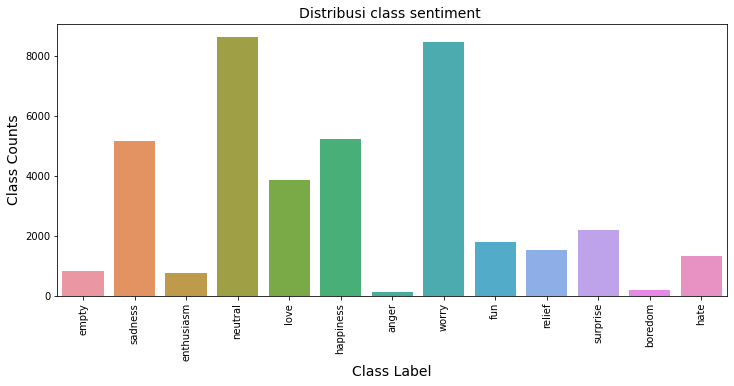

In [154]:
#cek jumlah label
plt.figure(figsize=(12,5))
sns.countplot(x='sentiment', data=tweets)
plt.title('Distribusi class sentiment ', fontsize=14)
plt.ylabel('Class Counts', fontsize=14)
plt.xlabel('Class Label', fontsize=14)
plt.xticks(rotation='vertical');

In [166]:
from sklearn.preprocessing import LabelEncoder

X = data.iloc[:, 2].values  # ':' berarti mengambil satu kolom kebawah penuh, di kolom index ke 2
le = LabelEncoder()
le.fit(["anger", "boredom", "empty", "enthusiasm", "fun", "happiness", "hate", "love", "neutral","relief", "sadness", "surprise", "worry"])

print(list(le.classes_))
y = le.transform(tweets.iloc[:, 1].values)

#y = tweets.iloc[:, 1].values
print(X.shape)
print(X[0])
print(y.shape)
print(y[0])

['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry']
(40000,)
@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[
(40000,)
2


In [167]:
# Membuat empty List
processed_tweets = []

for tweet in range(0, len(X)):  
    # Hapus semua special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

    # Hapus semua single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

    # Hapus single characters dari awal
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 

    # Substitusi multiple spaces dengan single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    # Hapus prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

    # Ubah menjadi Lowercase
    processed_tweet = processed_tweet.lower()

    # Masukkan ke list kosong yang telah dibuat sebelumnya
    processed_tweets.append(processed_tweet)

In [168]:
# Cek sebelum cleaning data
print(str(X[:5]))
print()

# Cek setelah cleaning data
processed_tweets[:5]

['@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =['
 'Layin n bed with a headache  ughhhh...waitin on your call...'
 'Funeral ceremony...gloomy friday...'
 'wants to hang out with friends SOON!'
 '@dannycastillo We want to trade with someone who has Houston tickets, but no one will.']



[' tiffanylue know was listenin to bad habit earlier and started freakin at his part ',
 'layin bed with headache ughhhh waitin on your call ',
 'funeral ceremony gloomy friday ',
 'wants to hang out with friends soon ',
 ' dannycastillo we want to trade with someone who has houston tickets but no one will ']

Ekstrasi Fitur dan Pembuatan Model

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'),ngram_range=(1,3))
X1 = tfidfconverter.fit_transform(processed_tweets).toarray()

In [170]:

#membagi data ke training dan test set

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0) #20% data testing

In [171]:
#pelatihan dan evaluasi teks
import time
from sklearn.naive_bayes import GaussianNB
text_classifier_nb = GaussianNB()  
t0_nb = time.time()
text_classifier_nb.fit(X_train, y_train)
t1_nb = time.time()

In [172]:
t2 = time.time()
predictions_nb = text_classifier_nb.predict(X_test)
t2_nb = time.time()
time_linear_train_nb = t1_nb-t0_nb
time_linear_predict_nb = t2_nb-t2
print("NB Training time: %fs; Prediction time: %fs" % (time_linear_train_nb, time_linear_predict_nb))

NB Training time: 0.530283s; Prediction time: 0.789953s


Evaluasi

In [173]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [174]:
print("Naive Bayes")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_nb)*100,2),'%')

print("")
print("Naive Bayes")
print(confusion_matrix(y_test,predictions_nb))  

print("")
print("Naive Bayes")
print(classification_report(y_test,predictions_nb))  

Naive Bayes
Accuracy  =  5.09 %

Naive Bayes
[[  4   0   1   7   1   1   7   1   0   1   0   0   0]
 [  5   3   9   9   0   0   7   1   1   8   0   1   1]
 [ 15   9  39  48  11   4  12  12   1  15   6   7   0]
 [ 10   5  25  55   8   1   8   9   1  13   7   8   0]
 [ 37  30  57  49  26   1  57   6   0  56   4  12   3]
 [142  80 174 204  68  31 120  42   5  99  22  41   9]
 [ 33  28  30  46  13   5  38   3   0  32   7  12   0]
 [ 63  36 143 236  29   7  57  79  10  47  21  32   2]
 [114 102 318 488  77  17 143 157  20 114  61  86   6]
 [ 41  22  52  52  17   3  54   8   0  46   5  12   3]
 [ 60  61 210 300  46  13  92  82  15  69  30  57   4]
 [ 62  49  62  77  21   5  82   5   2  54   2  27   6]
 [209 152 272 334 109  31 268  52   9 181  25  57   9]]

Naive Bayes
              precision    recall  f1-score   support

           0       0.01      0.17      0.01        23
           1       0.01      0.07      0.01        45
           2       0.03      0.22      0.05       179
         

In [175]:
# Naive Bayes
# Input text
review = "i know you will past the test congratulation"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_nb.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['enthusiasm']
